In [1]:
import pandas as pd

In [5]:
texts = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label', 'message'])

In [6]:
texts.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data cleaning and Pre-processing

In [7]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [58]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [59]:
corpus = []
for i in range(0, len(texts)):
    review = re.sub('[^a-zA-Z]', '', texts['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

### Bag of Words model

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(5000)
X = cv.fit_transform(corpus).toarray()

C:\Users\dines\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass input=5000 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [61]:
y = pd.get_dummies(texts['label'])
y = y.iloc[:,1].values

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

### Modelling

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
spam_detect_model = MultinomialNB()
spam_detect_model.fit(X_train,y_train)

MultinomialNB()

In [65]:
y_pred = spam_detect_model.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test,y_pred)
confusion_m

array([[955,   0],
       [156,   4]], dtype=int64)

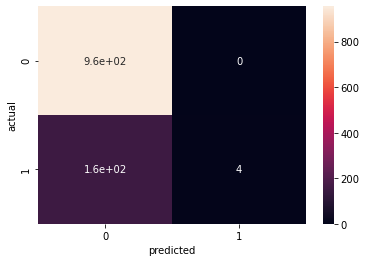

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
data = {'actual' : y_test, 'predicted' : y_pred}
df = pd.DataFrame(data, columns = ['actual', 'predicted'])
confusion_matrix = pd.crosstab(df['actual'], df['predicted'], rownames = ['actual'], colnames = ['predicted'])
sns.heatmap(confusion_matrix, annot = True)
plt.show()

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8600896860986547